# **Question 1 (PCA)**

In [0]:
import numpy as np
import string
import os
import cv2
from sklearn.model_selection import train_test_split
from random import random
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import  downscale_local_mean
import matplotlib.pyplot as plt

In [0]:
def flattern(data):
  data_f=[]
  for i in range(data.shape[0]):
    data_f.append(data[i].flatten())
  return np.array(data_f)

## **Load data**

In [0]:
data=[]
label=[]
dim=(100,100)
file_path='/content/drive/My Drive/A3/dataset'
for _, _, files in os.walk(file_path):
  for ii in files:
    img=cv2.imread(file_path+"/"+ii,cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
    data.append(resized)
    l=ii.split("_")
    label.append(int(l[0]))
data=np.array(data)
label=np.array(label)
data=flattern(data)

## **Finding Coverence matrix using numpy**

In [5]:
cov=np.cov(data.T)
print(cov.shape)

(10000, 10000)


## **Finding eiganvalue(sorted order) and eigenvector**

In [0]:
eig_val, eig_vec= np.linalg.eig(cov)
idx = eig_val.argsort()[::-1]   
eig_val = eig_val[idx]
eig_vec = eig_vec[:,idx]

## **Finding Component with 95% variance retained**

In [0]:
total_sum=np.sum(eig_val)
sum=0
count=1
index=[]
pre=[]
for i in eig_val:
  sum+=i
  pre.append((sum/total_sum)*100)
  index.append(count)
  count+=1
  if(((sum/total_sum)*100)>95):
    break

## **Graph b/t Components vs Variance**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


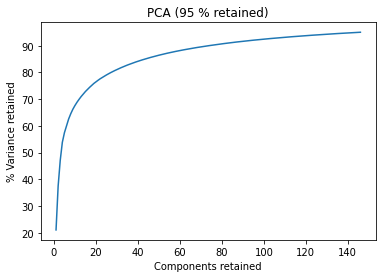

In [0]:
ptl.plot(index,pre)
ptl.title("PCA (95 % Variance retained)")
ptl.ylabel("% Variance retained")
ptl.xlabel("Components retained")
ptl.show()

## **Finding MSE b/t orginal data vs Constructed data**

In [0]:
from sklearn.metrics import mean_squared_error
max_i=100
e_list=[]
for j in range(1,max_i):  
  sum=0
  m= np.real(eig_vec[:,0:j])
  m= np.dot(m,m.T)
  XX=np.dot(data,m)
  error = mean_squared_error(data,XX)
  e_list.append(error)


## **Graph b/t Components vs MSE**

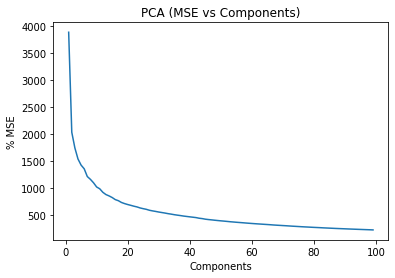

In [0]:
plt.plot([i+1 for i in range(len(e_list))], e_list)
ptl.title("PCA (MSE vs Components)")
ptl.ylabel("% MSE")
ptl.xlabel("Components")
ptl.show()

## **Plot images original and Constructed data**

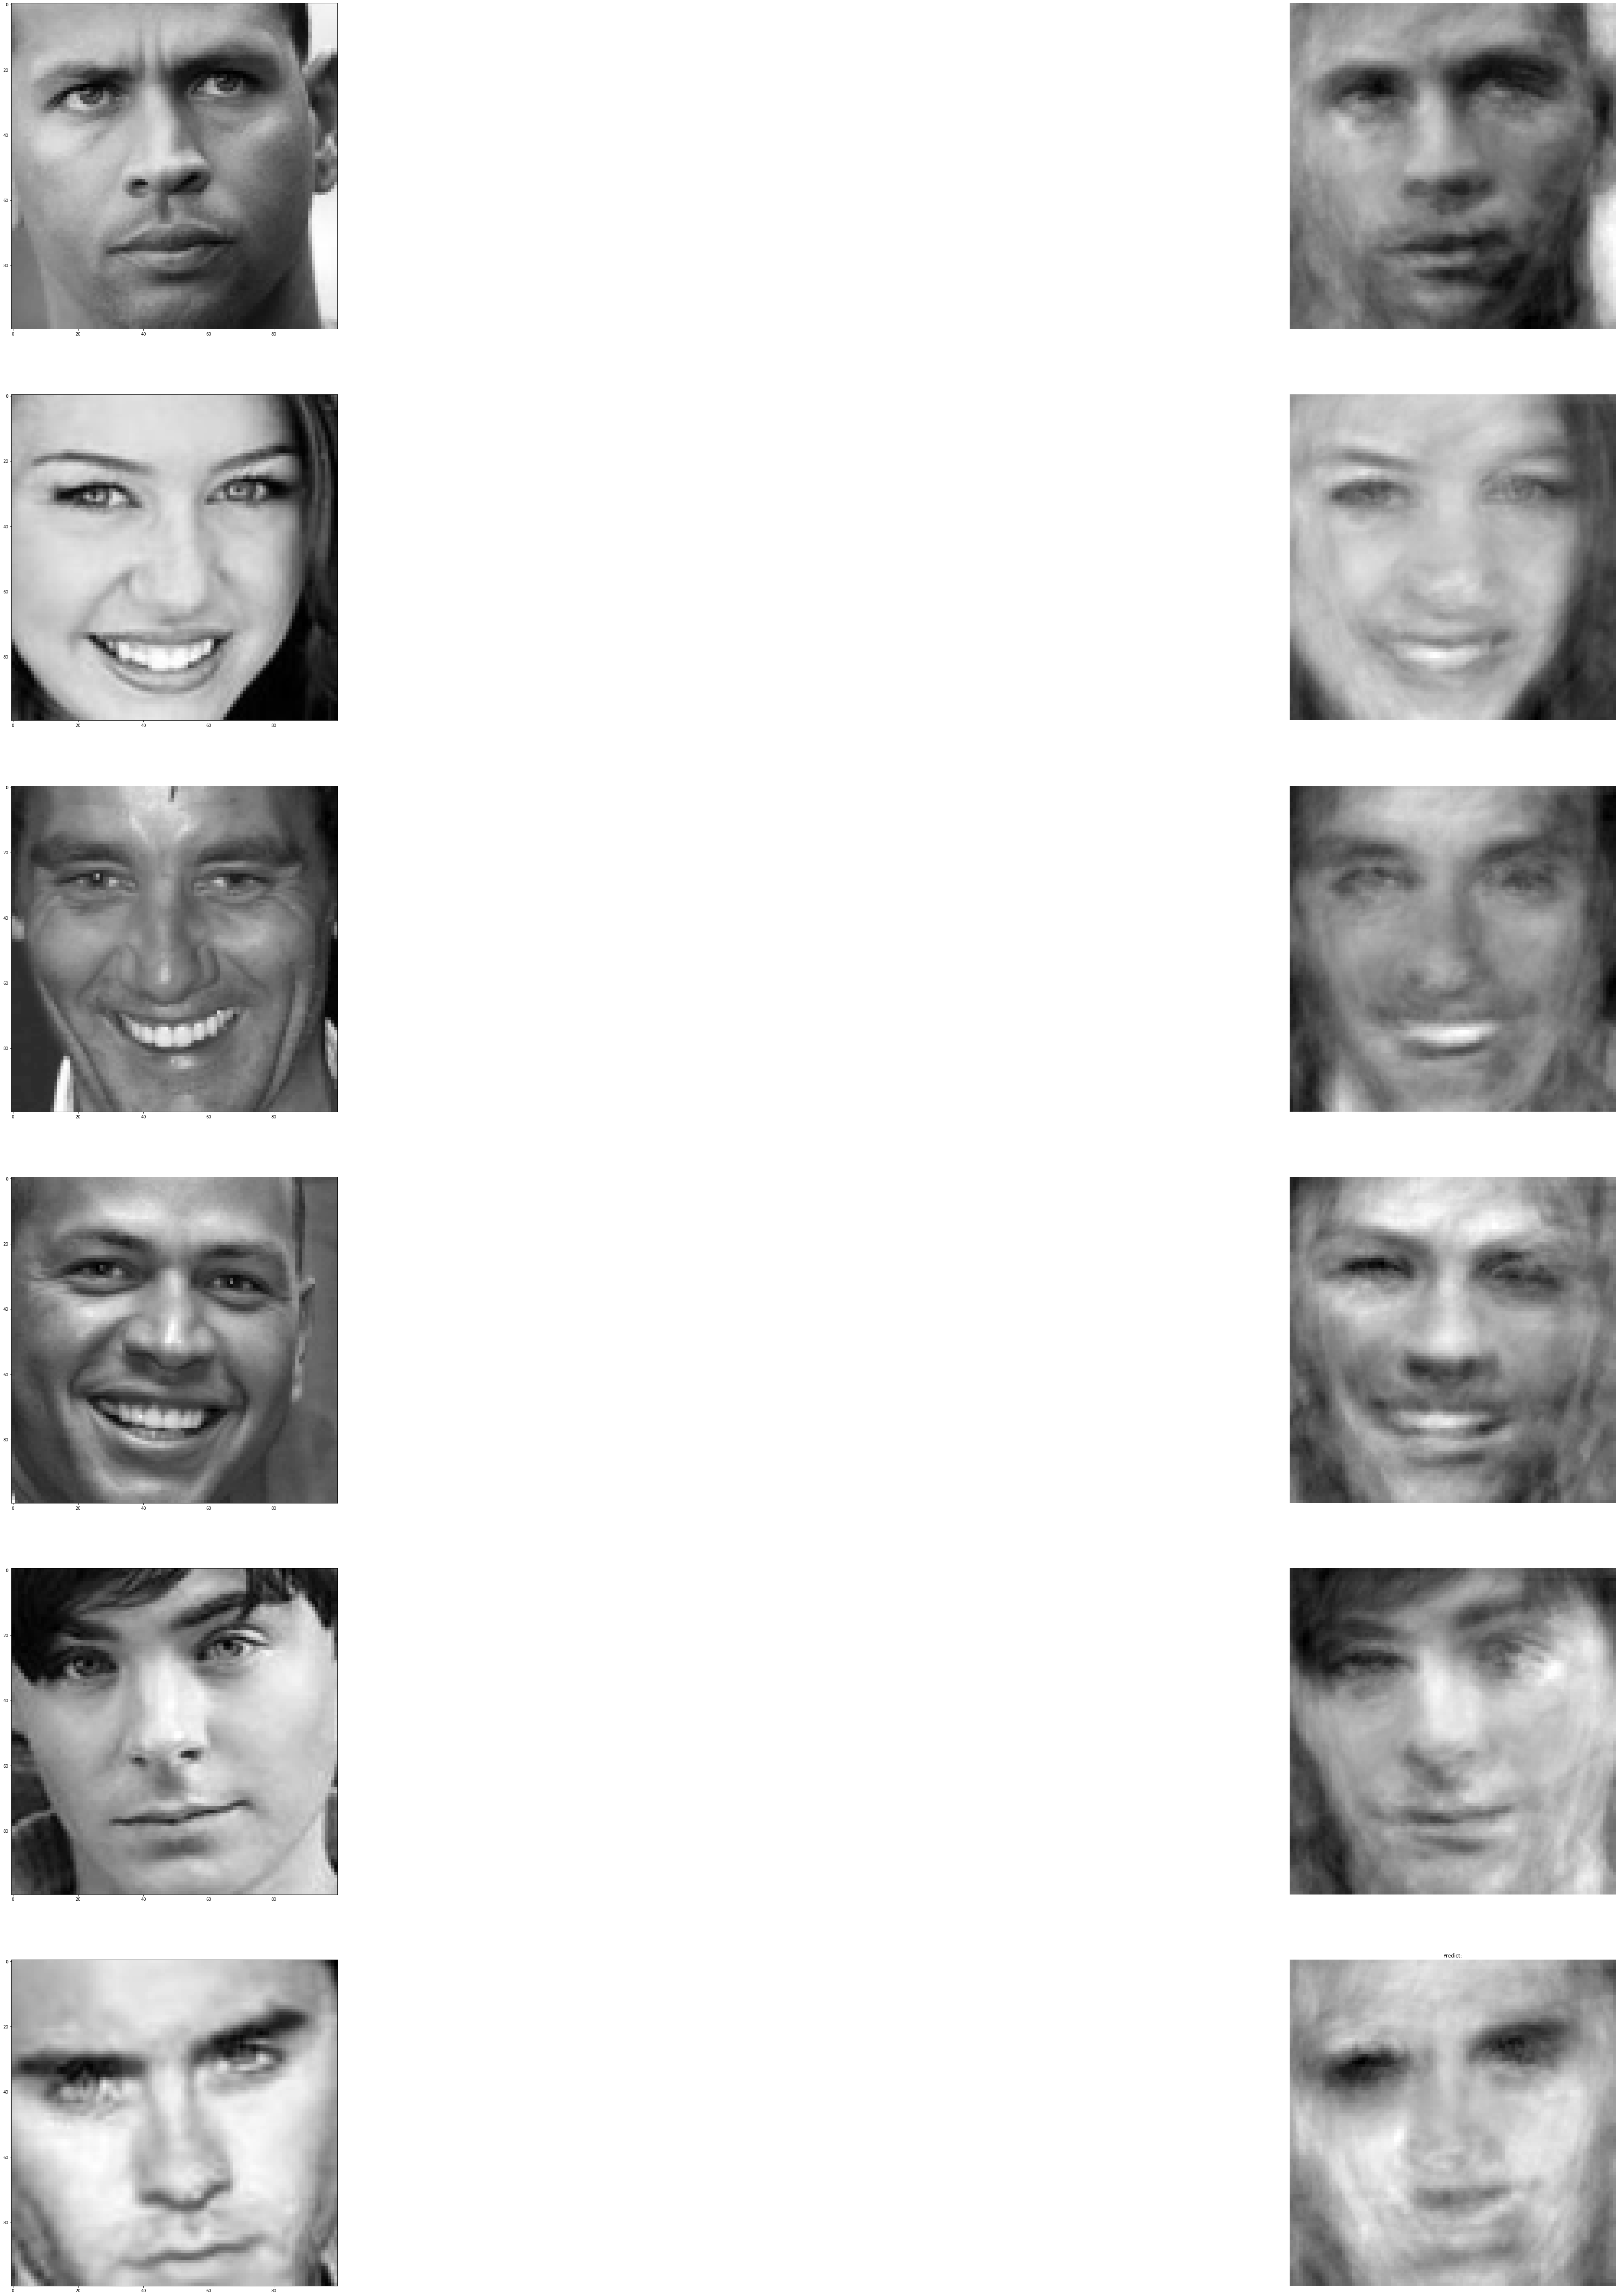

In [0]:
fig=plt.figure(figsize=(100, 100))
columns = 2
rows = 6
vec = np.real(eig_vec[:,0:75])
vec= np.dot(vec,vec.T)
rec_img=np.dot(data,vec)
c=1
for i in range(1, columns*rows +1):
    index= np.random.randint(low=0,high=len(data))
    img = data[index].reshape([100,100])
    img_ =rec_img[index].reshape([100,100])
    fig.add_subplot(rows, columns, c)
    plt.imshow(img,cmap='gray')
    c+=1
    fig.add_subplot(rows, columns, c)
    plt.imshow(img_, cmap='gray')
    plt.axis('off')
    c+=1
    if c>rows*columns:
      break
plt.show()

## **Plot 1D using the number of principal components**

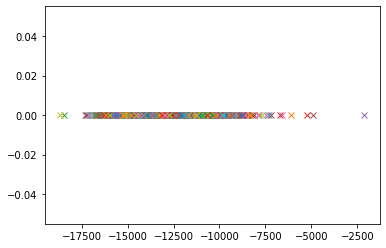

In [14]:
import numpy as np
import matplotlib.pyplot as pp
val = 0.
m= np.real(eig_vec[:,0:1])
XX=np.dot(data,m)
XX=XX.T
x=XX.reshape([1,520])
pp.plot(x, np.zeros_like(x) + val, 'x')
pp.show()

## **Plot 2D using the number of principal components**

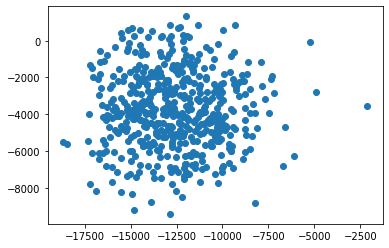

In [9]:
import matplotlib.pyplot as plt
m= np.real(eig_vec[:,0:2])
XX=np.dot(data,m)
XX=XX.T
plt.scatter(XX[0],XX[1])
plt.show()

## **Plot 3D using the number of principal components**

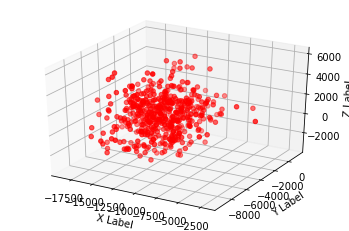

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
m= np.real(eig_vec[:,0:3])
XX=np.dot(data,m)
XX=XX.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(XX[0],XX[1],XX[2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()